# Lesson 14 - NumPy

### The following topics are discussed in this notebook:
* Create NumPy arrays.
* Array operations.
* Boolean masking. 





## Introduction to NumPy

**NumPy**, which is short for "Numerical Python" is a package that provides additional functionality for performing numerical calculations involving lists. It can greatly simplify certain types of tasks relating to lists that would otherwise require loops. In the next cell, we will import NumPy under the name `np`. 

In [1]:
import numpy as np

At the core of NumPy is a new data type called an **array**. Arrays are similar to lists, and in many ways, arrays and lists behave the same. 

We can create an array from a list using the function `np.array()`. 

In [2]:
myList = [4, 1, 7, 3, 5]
myArray = np.array([4, 1, 7, 3, 5])

In the next few cells, we show that lists and arrays can behave in very similar ways. 

In [3]:
print(myList[3])
print(myArray[3])

3
3


In [4]:
print(myList[:3])
print(myArray[:3])

[4, 1, 7]
[4 1 7]


In [5]:
print(len(myList))
print(len(myArray))

5
5


In [6]:
print(type(myList))
print(type(myArray))

<class 'list'>
<class 'numpy.ndarray'>


## Array Operations

The primary difference between arrays and lists is that certain types of operations can be performed more easily on arrays than on lists. 

Assume that we want to create a list by multiplying each element of `myList` by 5. We could do so as follows:

In [7]:
new_list = []
for i in range(0, len(myList)):
    new_list.append(5 * myList[i])
print(new_list)

[20, 5, 35, 15, 25]


This goal is much easier to accomplish with arrays, however. We simply multiply `myArray` by 5. 

In [8]:
new_array = 5 * myArray
print(new_array)

[20  5 35 15 25]


Recall that we can, in fact, multiply lists by integers. However, this operations replicates the list rather than performing the multiplication operation elementwise. 

In [9]:
print(5 * myList)

[4, 1, 7, 3, 5, 4, 1, 7, 3, 5, 4, 1, 7, 3, 5, 4, 1, 7, 3, 5, 4, 1, 7, 3, 5]


We can perform other types of arithmetic operations on NumPy arrays. In each case, the specified operation is applied to each individual element of the array. 

In [10]:
print(myArray ** 2)

[16  1 49  9 25]


In [11]:
print(myArray +  100)

[104 101 107 103 105]


NumPy also includes a meaningful way to add, subtract, multiply, and divide arrays, as long as they are of the same length. 

In [12]:
array1 = np.array([1,4,3])
array2 = np.array([5,8,2])

print('Sum:        ', array1 + array2)
print('Difference: ', array1 - array2)
print('Product:    ', array1 * array2)
print('Ratio:      ', array1 / array2)

Sum:         [ 6 12  5]
Difference:  [-4 -4  1]
Product:     [ 5 32  6]
Ratio:       [0.2 0.5 1.5]


If we attempt to perform an arithmetic operation on two lists of different sizes, this will produce an error (except in certain, very specific cases that we will discuss later).

In [13]:
array1 = np.array([2, 1, 4])
array2 = np.array([3, 9, 2, 7])

# print(array1 + array2) # This results in an error

## Data Types of Array Elements

Arrays can contain elements of any data type, but unlike lists, each element within an array must be of the same data type.

**Note:** Numpy does provide a data type called a structured array that can contain a mix of data types, but we will not discuss those in this lesson.

In the cell below, lets see what happens when we try to assign a floating point value to an element within an array of integers. 

In [14]:
int_array = np.array([8, 4, 5, 2, 4, 6, 3])
print(int_array)

int_array[2] = 7.9
print(int_array)

[8 4 5 2 4 6 3]
[8 4 7 2 4 6 3]


Now let's see what happens if we try to assign a string to an element in an array of integers.

In [15]:
int_array = np.array([8, 4, 5, 8, 4, 6, 3])
print(int_array)

int_array[2] = '7.9'
print(int_array)

[8 4 5 8 4 6 3]


ValueError: invalid literal for int() with base 10: '7.9'

We can coerce the data types of all elements within an array using the `astype()` method. 

In [16]:
float_array = int_array.astype('float')
print(float_array)

float_array[2] = 7.9
print(float_array)

[8. 4. 5. 8. 4. 6. 3.]
[8.  4.  7.9 8.  4.  6.  3. ]


## Array Functions

Most list functions can also be applied to arrays. For example, functions such as `sum()` and `len()` operate on arrays in exactly the same way as they would on lists. The numpy package also provides us with several additional functions that do not exist in base Python, as well as versions of standard Python functions that have been optimized for arrays. 

For example, even though we can use `sum()` to calculate the sum of values in an array, numpy also provides us with a function called `np.sum()`, which can be used on both lists and arrays, but has been optimized for performance on arrays. To provide an example of this, we will import the `time` package, with provides us with a tool for measuring the execution time for portions of code. 

In [17]:
import time

The function time.time() will report the current system time, in seconds. In the following cell, we have four loops. Each loop will calculate one million sums, using either `sum()` or `np.sum()`, and running on either a list or an array. We will check the time before and after each loop runs. 

In [18]:
t1 = time.time()
for i in range(1000000):
    sum(myList)
    
t2 = time.time()
for i in range(1000000):
    sum(myArray)
    
t3 = time.time()
for i in range(1000000):
    np.sum(myList)
    
t4 = time.time()
for i in range(1000000):
    np.sum(myArray)

t5 = time.time()

In the cell below, we will calculate the time required for each loop to run, and will plot the results using `matplotlib`. 

In [55]:
import matplotlib.pyplot as plt

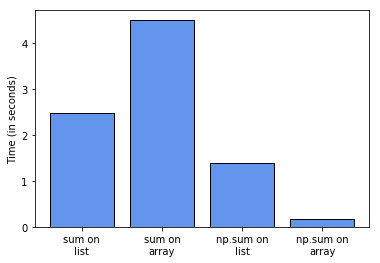

In [56]:
labels = ['sum on\nlist', 'sum on\narray', 'np.sum on\nlist', 'np.sum on\narray']
heights = [t5 - t4, t4 - t3, t3 - t2, t2 - t1]

plt.bar(range(4), heights, color='cornflowerblue', edgecolor='k')
plt.xticks(range(4), labels)
plt.ylabel('Time (in seconds)')
plt.show()

Numpy also provides the following functions: 

* **`np.max()`** returns the largest element in an array. 
* **`np.min()`** returns the smallest element in an array. 
* **`np.argmax()`** returns the index of the largest element in an array. 
* **`np.argmin()`** returns the index of the smallest element in an array. 
* **`np.mean()`** returns the mean of the elements in an array. 
* **`np.std()`** returns the standard deviation of elements in an array. 
* **`np.unique()`** returns an array of distinct elements in an array. 

In [20]:
test_array = np.array([32, 48, 87, 87, 64, 53, 53, 18, 48, 18, 54, 31, 32, 18])

print('Sum:               ', np.sum(test_array))
print('Max:               ', np.max(test_array))
print('Min:               ', np.min(test_array))
print('ArgMax:            ', np.argmax(test_array))
print('ArgMin:            ', np.argmin(test_array))
print('Mean:              ', np.mean(test_array))
print('Standard Deviation:', np.std(test_array))
print('Distinct Elements: ', np.unique(test_array))

Sum:                643
Max:                87
Min:                18
ArgMax:             2
ArgMin:             7
Mean:               45.92857142857143
Standard Deviation: 22.079286627044446
Distinct Elements:  [18 31 32 48 53 54 64 87]


## Elementwise Functions

Numpy provides us with several elementwise functions. The functions will apply a certain operation to each element of an array, returning a new array. We will not cover all of these here, but will show you a few examples. 

* **`np.exp()`** raises `e` to each element within an array. 
* **`np.log()`** applies the natural logarithm to each element within an array. 
* **`np.round()`** rounds each element of an array to a specified number of decimal places. 

In [21]:
float_array = [3.45143, 1.23498, 6.57618, 3.47508, 7.50698]

print('Example of np.exp:  ', np.exp(float_array))
print('Example of np.log:  ', np.log(float_array))
print('Example of np.round:', np.round(float_array, 2))
print('Example of np.round:', np.round(float_array, 0))

Example of np.exp:   [  31.54547009    3.43830975  717.79211952   32.30041247 1820.70669744]
Example of np.log:   [1.23878864 0.21105478 1.88345403 1.2456175  2.01583325]
Example of np.round: [3.45 1.23 6.58 3.48 7.51]
Example of np.round: [3. 1. 7. 3. 8.]


**<font color="orangered" size="5">� Exercise</font>**

Two lists, `sales` and `prices` are provided below. Each entry of sales provides the number of units of a different product sold by a store during a given week. The `prices` lists provides the unit price of each of the products.

Without using NumPy, write some code that will print out a single number `totalSales` that is equal to the store's total revenue during the week.

In [22]:
sales = [24, 61, 17, 34, 41, 29, 32, 43]
prices = [10.50, 5.76, 13.49, 8.13, 7.79, 12.60, 9.51, 11.34]

totalSales = 0
for i in range(0, len(sales)):
    totalSales += sales[i] * prices[i]
    
print(totalSales)

2585.84


The cell below convers the lists `sales` and `price` into arrays. Use NumPy to accomplish to calculate `totalSales`. See if you can do it with only one new line of code. 

In [23]:
sales = np.array(sales)
prices = np.array(prices)

totalSales = np.sum(sales * prices)
print(totalSales)

2585.84


## Array Comparisons

Unlike lists, we can perform numerical comparisons with arrays. The comparison is carried out for each element of the array, and the result is an array of boolean values, containing the results of each comparison.

In [24]:
someArray = np.array([4, 7, 6, 3, 9, 8])
print(someArray < 5)

[ True False False  True False False]


There are many applications of array comparisons, but one is that it provides us with a convenient way to count the number of elements in an array that satisfy a certain condition. Since Python treats `True` as being equal to 1 and `False` as being equal to 0, we can use the sum function along with Boolean masking to count the number of elements in an array that satisfy a certain critera. 

In [25]:
cat = np.array(['A', 'C', 'A', 'B', 'B', 'C', 'A', 'A' ,
                'C', 'B', 'C', 'C', 'A', 'B', 'A', 'A'])

In [26]:
print('Count of A:', sum(cat == 'A'))
print('Count of B:', sum(cat == 'B'))
print('Count of C:', sum(cat == 'C'))

Count of A: 7
Count of B: 4
Count of C: 5


In [27]:
val = np.array([8, 1, 3, 6, 10, 6, 12, 4,
                6, 1, 4, 8,  5, 4, 12, 4])

print('Number of elememts > 6: ', sum(val > 6) )
print('Number of elements <= 6:', sum(val <= 6) )
print('Number of even elements:', sum(val % 2 == 0) )
print('Number of odd elements: ', sum(val % 2 != 0) )

Number of elememts > 6:  5
Number of elements <= 6: 11
Number of even elements: 12
Number of odd elements:  4


## Logical Operators for Arrays

We can use the `&` and `|` operators to combine two boolean arrays into a single boolean array. 

* `&` performs the **and** operation on the elements of the two arrays, one pair at a time.
* `|` performs the **or** operation on the elements of the two arrays, one pair at a time.

In [28]:
b1 = np.array([True, True, False, False])
b2 = np.array([True, False, True, False])

In [29]:
print(b1 & b2)
print(b1 | b2)

[ True False False False]
[ True  True  True False]


We can use these operators to perform counts that depend on two (or more) conditions.

**<font color="orangered" size="5">� Exercise</font>**

Use boolean masking to count the number of elements in `val` that are both even and greater than 5.


In [30]:
count = sum( (val > 5) & (val % 2 == 0) )
print(count)

8


**<font color="orangered" size="5">� Exercise</font>**

Use boolean masking to count the number of elements in `val` that are even, divisible by 3, and greater than 7.

In [31]:
count = sum( (val > 7) & (val % 2 == 0) & (val % 3 == 0))
print(count)

2


**<font color="orangered" size="5">� Exercise</font>**

Use boolean masking to count the number of elements in `cat` that are equal to `A`, and for which the associated element of `val` is greater than 5. 

In [32]:
count = sum( (val > 5) & (cat == 'A') )
print(count)

3


## Boolean Masking

**Boolean masking** is a tool for creating subsets of NumPy arrays. Boolean masking is performed by providing an array of Boolean values to another array of the same size, as if it were an index. This returns a subset of elements of the outer array that correspond to `True` values within the Boolean array. 

Let's see an example. 

In [33]:
boolArray = np.array([True, True, False, True, False])
myArray = np.array([1,2,3,4,5])

subArray = myArray[boolArray]
print(subArray)

[1 2 4]


Since array comparisons return Boolean arrays, we can use array comparisons inside of square braces to quickly filter an array based on some criteria.

In [34]:
cat = np.array(['A', 'C', 'A', 'B', 'B', 'C', 'A', 'A' ,
                'C', 'B', 'C', 'C', 'A', 'B', 'A', 'A'])

val = np.array([8, 1, 3, 6, 10, 6, 12, 4,
                6, 1, 4, 8,  5, 4, 12, 4])

In [35]:
print(val[val > 6])
print(val[val <= 6])

[ 8 10 12  8 12]
[1 3 6 6 4 6 1 4 5 4 4]


In [36]:
print(val[val % 2 == 0])
print(val[val % 2 != 0])

[ 8  6 10  6 12  4  6  4  8  4 12  4]
[1 3 1 5]


In [37]:
print(val[cat == 'A'])

[ 8  3 12  4  5 12  4]


**<font color="orangered" size="5">� Exercise</font>**

Find the total of the elements in `val` that correspond to elements of `cat` that are equal to `A`. Do same thing for elements of `cat` that are equal to `B`, and those that are equal to `C`. Print the results. 

In [38]:
print('Total for category A:', np.sum(val[cat == 'A']))
print('Total for category B:', np.sum(val[cat == 'B']))
print('Total for category C:', np.sum(val[cat == 'C']))

Total for category A: 48
Total for category B: 21
Total for category C: 25


## Functions to Create Arrays

We can use the functions `np.zeros()`, `np.ones()`, `np.arange()`, and `np.linspace()` to create arrays with specific structures. We will illustrate these functions one at a time. 

The function `np.zeros()` creates and array consisting of only zeros.

In [39]:
array0 = np.zeros(10)
print(array0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


The function `np.ones()` creates and array consisting of only ones.

In [40]:
array1 = np.ones(10)
print(array1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


The function `np.arange()` creates a sequence of evenly spaced elements. We specify where the sequence should start, where it should stop, and the difference between consecutive elements. 

In [41]:
array2 = np.arange(start=2, stop=4, step=0.25)
print(array2)

[2.   2.25 2.5  2.75 3.   3.25 3.5  3.75]


Like `np.arange()`, the function `np.linspace()` also creates a sequence of evenly spaced elements. Instead of specifying the step size, we provide `np.linspace()` with the number of elements to be created. 

In [42]:
array3 = np.linspace(start=2, stop=4, num=11)
print(array3)

[2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]


**<font color="orangered" size="5">� Exercise</font>**

Several arrays are defined in the cell below. These arrays are meant to contain records for the salespersons working at a certain company. 

`EID`, `fname`, and `lname` store the employee ID and name of the salespeople. The array `salary` contains the monthly salaries of the employees. 

The arrays `sales_month`, `sales_EID`, `sales_rev`, and `sales_exp` represent entries in a table of sales data. Each particular index in these lists refers to a month, and employee, and the total revenues and expenses for that employee during that month. 

In [43]:
EID = np.array([103, 106, 107, 111, 115])
fname = np.array(['Anna', 'Brad', 'Cory', 'Brad', 'Emma'])
lname = np.array(['Jones', 'Green', 'Brown', 'Davis', 'Green'])
salary = np.array([5620, 6250, 5480, 4350, 4640])


sales_month = np.array(['Jan']*5 + ['Feb']*5 + ['Mar']*5 + ['Apr']*5 + ['May']*5 + ['Jun']*5 +
                       ['Jul']*5 + ['Aug']*5 + ['Sep']*5 + ['Oct']*5 + ['Nov']*5 + ['Dec']*5)
    
sales_EID = np.array([103, 106, 107, 111, 115]*12)

sales_rev = np.array([16887, 36296, 10219, 22377, 43366, 20087, 25643, 29853, 19925, 45259, 30953, 27038, 
                      23563, 14986, 32105, 29042, 26106, 47848, 30160, 21224, 37301, 38803, 16794, 36425,
                      29011, 19220, 41406, 24551, 29567, 29522, 20435, 16094, 17346, 21056, 25443, 29500, 
                      25748, 16914, 10973, 23193, 19599, 27395, 31450, 21705, 22856, 39687,  8435, 14932,
                      24479, 32870, 32042, 30693, 12245, 15057, 13041, 43451, 27246, 21278, 36200, 15107])

sales_exp = np.array([ 724, 2138, 2978, 1351, 1542, 1667, 1954, 1192, 1454, 1741, 2019, 1882, 
                      1681, 1894, 1068, 1442, 1382, 3075,  665,  990, 1426, 1654, 1649, 1325,  
                       958, 4082, 1713, 2127, 3086, 1481, 3309, 1313, 1823, 1635, 1632, 2378, 
                      2551, 1715, 2290, 1782, 2126, 1356, 2630, 2316, 1644, 2003,  769, 2402, 
                      1628, 1155, 2274, 2538, 2090, 2652, 2909, 2281, 2238, 2844,  789, 1528])



In the cell below, we use numpy operations to calculate the total annual revenue, expenses, and profit generated by each employee.

In [44]:
rev_by_employee = np.zeros(5).astype('int')
exp_by_employee = np.zeros(5).astype('int')

for i in range(len(EID)):
    rev_by_employee[i] = np.sum(sales_rev[sales_EID == EID[i]])
    exp_by_employee[i] = np.sum(sales_exp[sales_EID == EID[i]])

profit_by_employee = rev_by_employee - exp_by_employee - salary

print('Revenue: ', rev_by_employee)
print('Expenses:', exp_by_employee)
print('Profit:  ', profit_by_employee)

Revenue:  [338204 330903 266993 282910 332997]
Expenses: [25731 21488 26206 21085 18430]
Profit:   [306853 303165 235307 257475 309927]


We will now identify the employee who generated the greatest total annual revenue. 

In [45]:
n = np.argmax(rev_by_employee)

print('EID:    ', EID[n])
print('Name:   ', fname[n], lname[n])
print('Revenue:', rev_by_employee[n])

EID:     103
Name:    Anna Jones
Revenue: 338204


Now let's identify the employee who generated the greatest total annual profit. 

In [46]:
n = np.argmax(profit_by_employee)

print('EID:   ', EID[n])
print('Name:  ', fname[n], lname[n])
print('Profit:', profit_by_employee[n])

EID:    115
Name:   Emma Green
Profit: 309927


Finally, let's determine the month during which the company generated the most revenue.

In [47]:
months = np.unique(sales_month)
total_monthly_sales = np.zeros(12).astype('int')

for i in range(12):
    total_monthly_sales[i] = np.sum(sales_rev[sales_month == months[i]])
    
n = np.argmax(total_monthly_sales)    

print('Month:  ', months[n])
print('Revenue:', total_monthly_sales[n])

Month:   May
Revenue: 158334


## np.where

The numpy function `np.where()` is a useful tool for creating new arrays by applying logical rules to currently existing arrays. Assume that `A`, `B`, and `C` are arrays. The syntax for using `np.where()` is as follows:

    D = np.where(condition involving elements of A, B, C)
    
In terms of the results, this code is equivalent to the following:

    D = []
    for i in range(0, len(A)):
        if condition is True for A[i]:
            D.append(B[i])
        else:
            D.append(C[i])
    D = np.array(D)
    
Although the results are the same, the numpy version of this code will run significantly faster. 


## Example: Calculating Likelihood

To see an example of using `np.where()`, assume that we have created a statistical model that estimates the probability that students will pass a certain profession exam based on several factors, such as the amount of time they spent studying, whether or not they attended a workshop, and so on. Assume that the model is applied to five students. In the cell below, we have two arrays. The array `prob_of_passing` tells us the probability of each student passing the exam, as determined by the model. The array `result` tells us whether or not the student actually passed. 

In [48]:
prob_of_passing = np.array([0.3, 0.8, 0.6, 0.9, 0.1])
results = np.array(['F', 'P', 'F', 'P', 'F'])

We want to score how well the model did by calculating its **likelihood** score. This is equal to the probability that the students got exactly the results observed, according to the model. Since the model only directly estimates the probability of passing and some students failed, we will also need to find the probability of failing. 

In [49]:
prob_of_failing = 1 - prob_of_passing
print(prob_of_failing)

[0.7 0.2 0.4 0.1 0.9]


We will now use `np.where()` to create an array that contains the model's estimate of probability that each individual student got the outcome observed. 

In [50]:
prob_observed = np.where(results == 'P', prob_of_passing, prob_of_failing)
print(prob_observed)

[0.7 0.8 0.4 0.9 0.9]


Finally, the model's likelihood score is calculated by multiplying together all of the probabilities in `prob_observed`. 

In [51]:
L = np.prod(prob_observed)
print(L)

0.18144


## Example: Assigning Grades

When using `np.where(condition, B, C)`, we are allowed to use values with basic data types such (`int`, `float`, `bool`, `str`) instead of arrays for either or both of the values `B` and `C`. To see an example of this, assume that we have a list of exam scores for 10 students, and we want to create an array that contains strings `Pass` or `Fail`, to indicate whether each student passed or failed the exam. Assume that a grade of 70 or higher is required for passing. 

In [52]:
scores = np.array([73, 92, 56, 61, 43, 87, 99, 75, 12, 94])
results = np.where(scores >= 70, 'Pass', 'Fail')
print(results)

['Pass' 'Pass' 'Fail' 'Fail' 'Fail' 'Pass' 'Pass' 'Pass' 'Fail' 'Pass']


A single `np.where()` statement behaves like an if-else statement inside of a loop. We can replicate the effects of an if-elif-else statment by nesting calls to `np.where()`. In the example below, we will assign letter grades to each of the students based on their exam scores.

In [53]:
grades = np.where(scores < 60, 'F', 
                  np.where(scores < 70, 'D', 
                           np.where(scores < 80, 'C',
                                    np.where(scores < 90, 'B', 'A'))))
                  
print(grades)

['C' 'A' 'F' 'D' 'F' 'B' 'A' 'C' 'F' 'A']


## Fancy Indexing

Python lists and numpy arrays both allow for basic indexing, as well as slicing. We have seen that we can also use Boolean arrays for selecing elements out of an array. Numpy provides us with one more tool for indexing that is not available in lists: **fancy indexing**. Fancy indexing refers to providing a list or array of indices to an array. This will return a subarray of elements associated with those indices, in the order determined by the indexing list/array. 

In [54]:
my_array = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
print(my_array[[6, 3, 8]])

[70 40 90]
